# Predicting Loan Approval Status Using Applicant Data
## Phase 2: Predictive Modelling


## Table of Contents
1. [Introduction](#itr)  
   1.1 [Phase 1 Summary](#Phase-1-Summary)  
   1.2 [Report Overview](#Report-Overview)  
   1.3 [Overview of Methodology](#Overview-of-Methodology)  
2. [Predictive Modelling](#pm)  
   2.1 [Feature Selection](#Feature-Selection)  
   2.2 [Model Fitting & Tuning](#Model-Fitting-&-Tuning)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.2.1 [Logistic Regression](#Logistic-Regression)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.2.2 [K-Nearest Neighbors](#K-Nearest-Neighbors)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.2.3 [Decision Tree](#Decision-Tree)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.2.4 [Random Forest Classfier](#Random-Forest-Classfier)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.2.5 [Naive Bayes](#Naive-Bayes)  
   2.3 [Neural Network Model Fitting & Tuning](#Neural-Network-Model-Fitting-&-Tuning)  
      &nbsp;&nbsp;&nbsp;&nbsp;2.3.1 [Neural Network - Hyperparameter tuning](#Neural-Network-Hyperparameter-tuning)  
         &nbsp;&nbsp;&nbsp;&nbsp;2.3.1.1 [Hyperparameter - layer1_unit_options](#Hyperparameter-layer1_unit_options)  
         &nbsp;&nbsp;&nbsp;&nbsp;2.3.1.2 [Hyperparameter - batch_size_options](#Hyperparameter-batch_size_options)  
         &nbsp;&nbsp;&nbsp;&nbsp;2.3.1.3 [Hyperparameter - dropout_options](#Hyperparameter-dropout_options)  
         &nbsp;&nbsp;&nbsp;&nbsp;2.3.1.4 [Hyperparameter - activation_combinations](#Hyperparameter-activation_combinations)  
         &nbsp;&nbsp;&nbsp;&nbsp;2.3.1.5 [Hyperparameter - decay_rate_options](#Hyperparameter-decay_rate_options)  
   2.4 [Model Comparison](#Model_Comparison)  
3. [Critique & Limitations](#cnl)  
4. [Summary & Conclusions](#snc)  
   4.1 [Project Summary](#Project-Summary)  
   4.2 [Summary of Findings](#Summary-of-Findings)  
   4.3 [Conclusion](#Conclusion)  
5. [References](#References)


## 1. Introduction <a id='itr'></a>

#### 1.1 Phase 1 Summary
In Phase 1, we performed comprehensive data cleaning and exploratory analysis on a publicly available loan approval dataset. This involved inspecting and understanding key attributes such as applicant age, income, loan amount, employment experience, credit history, and categorical demographics like education and housing status. We visualized distributions, identified outliers, handled missing values, and applied appropriate transformations to prepare the data for modeling.

As a final step in Phase 1, we exported the cleaned dataset for future use in Phase 2 using the following line of code:
dataset.to_csv("Phase2_Group56.csv", index=False)

This ensured consistency in data used across both phases and avoided repeating the cleaning pipeline.

While reviewing the Phase 1 feedback, we noted concerns about unrealistic values, specifically rows with applicant age exceeding 100. Upon further inspection, we found that although some rows had age > 100, they were accompanied by even more extreme values in other variables, such as employment_experience > 100. However, if we dropped all rows with unrealistic employment experience, only two rows with age > 100 would remain in the dataset — representing less than 0.5% of the total data (well below the 5% significance threshold for influence). Therefore, we decided to retain our original cleaning approach, balancing data quality with completeness, as the potential impact on modeling was minimal.

This prepared and validated dataset laid a strong foundation for the predictive modeling conducted in Phase 2.

#### 1.2 Report Overview
This report documents Phase 2 of our machine learning project, with a primary focus on predictive modeling for loan approval status. Building upon the cleaned and preprocessed dataset from Phase 1, we implemented and compared a total of five supervised classification models.

Specifically, we trained the following five traditional machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree Classifier
4. Random Forest Classifier
5. Naive Bayes

In addition to these, we also developed a Neural Network model using TensorFlow and Keras, and applied extensive hyperparameter tuning to optimize its structure and performance.

For each algorithm, we conducted thorough hyperparameter optimization using cross-validation and ROC AUC as the primary evaluation metric. Our goal was not only to assess the performance of individual models but also to compare their effectiveness using consistent evaluation techniques, including paired t-tests, to determine statistically significant differences in performance.

This phase combines model building, evaluation, and critical comparison, forming the core of our predictive analytics pipeline.

#### 1.3 Overview of Methodology
The following steps were carried out in Phase 2:

1. Feature Selection:  We used SelectKBest with ANOVA F-statistics to identify the top 10 most informative features, improving model focus and reducing dimensionality.<br>

2. Model Development: We implemented five supervised classification models using scikit-learn—Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Naive Bayes—and one Neural Network using Keras.

3. Hyperparameter Tuning: Grid search was applied to optimize parameters for the scikit-learn models. For the neural network, we manually tuned key hyperparameters such as layer size, batch size, activation functions, dropout rate, and learning rate decay.

4. Model Comparison: All models were evaluated using 5-fold cross-validated AUC scores. Paired t-tests were conducted to statistically compare performance differences between models.

5. Performance Summary and Critique: Final model performance was summarized on the test set, followed by a brief critique of modeling decisions and limitations.

In [1]:
#[1]
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Assessment requirement
pd.set_option('display.max_columns', None) 

# Importing the data
dataset = pd.read_csv("Phase2_Group56.csv")

dataset.sample(10,random_state=999)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
13061,24,female,master,105769.0,3,mortgage,10000.0,medical,6.17,0.09,4.0,686,yes,0
7136,24,male,bachelor,72818.0,0,rent,7000.0,education,7.51,0.10,4.0,662,no,1
36971,23,male,high school,100446.0,0,rent,12000.0,debtconsolidation,9.08,0.12,4.0,534,yes,0
28829,31,female,associate,116167.0,11,mortgage,9600.0,medical,5.99,0.08,5.0,567,no,0
34541,35,female,high school,65677.0,12,mortgage,2000.0,homeimprovement,6.71,0.03,12.0,708,no,0
24974,31,female,bachelor,96001.0,3,mortgage,5000.0,debtconsolidation,8.00,0.05,9.0,700,no,0
29287,37,female,high school,111472.0,14,rent,21000.0,venture,11.63,0.19,15.0,672,no,0
38051,27,male,master,42914.0,2,own,4197.0,medical,10.60,0.10,5.0,591,no,0
25034,29,female,associate,97022.0,5,mortgage,25000.0,homeimprovement,7.49,0.26,7.0,628,yes,0
1298,24,male,high school,71664.0,0,rent,16000.0,medical,16.45,0.22,2.0,587,no,1


In [2]:
print(dataset.shape) 

(44993, 14)


In [3]:
dataset.columns.values 

array(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'], dtype=object)

In [4]:
dataset.describe(include='all')

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,44993.000000,44993,44993,4.499300e+04,44993.000000,44993,44993.000000,44993,44993.000000,44993.000000,44993.000000,44993.000000,44993,44993.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,bachelor,NaN,NaN,rent,NaN,education,NaN,NaN,NaN,NaN,yes,NaN
freq,NaN,24836,13396,NaN,NaN,23440,NaN,9151,NaN,NaN,NaN,NaN,22856,NaN
mean,27.748428,NaN,NaN,7.990845e+04,5.394528,NaN,9583.176761,NaN,11.006448,0.139736,5.866557,632.585713,NaN,0.222257
std,5.909737,NaN,NaN,6.332213e+04,5.927159,NaN,6314.802655,NaN,2.978985,0.087207,3.877167,50.402411,NaN,0.415767
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.719500e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704600e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.577800e+04,8.000000,NaN,12237.000000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [5]:
data = dataset.drop(columns='loan_status')

In [6]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22,female,master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,no
1,21,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes
2,25,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no
3,23,female,bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,no
4,24,male,master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,27,male,associate,47971.0,6,rent,15000.0,medical,15.66,0.31,3.0,645,no
44989,37,female,associate,65800.0,17,rent,9000.0,homeimprovement,14.07,0.14,11.0,621,no
44990,33,male,associate,56942.0,7,rent,2771.0,debtconsolidation,10.02,0.05,10.0,668,no
44991,29,male,bachelor,33164.0,4,rent,12000.0,education,13.23,0.36,6.0,604,no


In [7]:
target = dataset['loan_status']

In [8]:
target

0        1
1        0
2        1
3        1
4        1
        ..
44988    1
44989    1
44990    1
44991    1
44992    1
Name: loan_status, Length: 44993, dtype: int64

In [9]:
target.value_counts()

loan_status
0    34993
1    10000
Name: count, dtype: int64

In [10]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [11]:
data.dtypes 

person_age                          int64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
dtype: object

In [12]:
cat_cols = data.columns[data.dtypes == "object"].tolist()
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [13]:
data_encoded = data.copy() #making a copy
data_encoded

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22,female,master,71948.0,0,rent,35000.0,personal,16.02,0.49,3.0,561,no
1,21,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes
2,25,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no
3,23,female,bachelor,79753.0,0,rent,35000.0,medical,15.23,0.44,2.0,675,no
4,24,male,master,66135.0,1,rent,35000.0,medical,14.27,0.53,4.0,586,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,27,male,associate,47971.0,6,rent,15000.0,medical,15.66,0.31,3.0,645,no
44989,37,female,associate,65800.0,17,rent,9000.0,homeimprovement,14.07,0.14,11.0,621,no
44990,33,male,associate,56942.0,7,rent,2771.0,debtconsolidation,10.02,0.05,10.0,668,no
44991,29,male,bachelor,33164.0,4,rent,12000.0,education,13.23,0.36,6.0,604,no


In [14]:
# [2]
# Looping through each categorical column
for c in cat_cols:
    q = data_encoded[c].nunique() # Count the number of unique categories in the column
    # If the column is binary
    if q == 2:
        data_encoded[c] = pd.get_dummies(data_encoded[c], drop_first=True)

# applying one-hot encoding to create binary indicator columns for each category
data_encoded = pd.get_dummies(data_encoded)

In [15]:
data_encoded.shape

(44993, 25)

In [16]:
data_encoded.sample(10,random_state=999)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture
13061,24,False,105769.0,3,10000.0,6.17,0.09,4.0,686,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
7136,24,True,72818.0,0,7000.0,7.51,0.10,4.0,662,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False
36971,23,True,100446.0,0,12000.0,9.08,0.12,4.0,534,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
28829,31,False,116167.0,11,9600.0,5.99,0.08,5.0,567,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
34541,35,False,65677.0,12,2000.0,6.71,0.03,12.0,708,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False
24974,31,False,96001.0,3,5000.0,8.00,0.05,9.0,700,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
29287,37,False,111472.0,14,21000.0,11.63,0.19,15.0,672,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True
38051,27,True,42914.0,2,4197.0,10.60,0.10,5.0,591,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
25034,29,False,97022.0,5,25000.0,7.49,0.26,7.0,628,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1298,24,True,71664.0,0,16000.0,16.45,0.22,2.0,587,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False


In [17]:
data_encoded.describe(include='all')

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture
count,44993.000000,44993,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993,44993
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
freq,NaN,24836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22856,32967,31597,44372,33023,38013,26508,44876,42042,23440,37848,35842,40210,36445,37442,37178
mean,27.748428,NaN,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.909737,NaN,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.000000,NaN,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.000000,NaN,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,26.000000,NaN,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,30.000000,NaN,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# [2]
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler() # Scaling all features to a range between 0 and 1
data_encoded_norm = data_scaler.fit_transform(data_encoded) # Normalizing all numerical values in the dataset

In [19]:
data_encoded_norm

array([[0.02702703, 0.        , 0.0262011 , ..., 0.        , 1.        ,
        0.        ],
       [0.01351351, 0.        , 0.00175444, ..., 0.        , 0.        ,
        0.        ],
       [0.06756757, 0.        , 0.00181836, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.17567568, 1.        , 0.02005276, ..., 0.        , 0.        ,
        0.        ],
       [0.12162162, 1.        , 0.01031032, ..., 0.        , 0.        ,
        0.        ],
       [0.05405405, 1.        , 0.0178677 , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
# [2]
# Converting the normalized NumPy array back into a DataFrame
data_new = pd.DataFrame(data_encoded_norm, columns=data_encoded.columns)

In [21]:
data_new.sample(10,random_state=999)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture
13061,0.054054,0.0,0.040058,0.039474,0.275362,0.051440,0.136364,0.071429,0.751269,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7136,0.054054,1.0,0.026558,0.000000,0.188406,0.143347,0.151515,0.071429,0.690355,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
36971,0.040541,1.0,0.037877,0.000000,0.333333,0.251029,0.181818,0.071429,0.365482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
28829,0.148649,0.0,0.044319,0.144737,0.263768,0.039095,0.121212,0.107143,0.449239,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34541,0.202703,0.0,0.023632,0.157895,0.043478,0.088477,0.045455,0.357143,0.807107,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24974,0.148649,0.0,0.036056,0.039474,0.130435,0.176955,0.075758,0.250000,0.786802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29287,0.229730,0.0,0.042395,0.184211,0.594203,0.425926,0.287879,0.464286,0.715736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
38051,0.094595,1.0,0.014305,0.026316,0.107159,0.355281,0.151515,0.107143,0.510152,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25034,0.121622,0.0,0.036475,0.065789,0.710145,0.141975,0.393939,0.178571,0.604061,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1298,0.054054,1.0,0.026085,0.000000,0.449275,0.756516,0.333333,0.000000,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
data_new.describe()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_education_associate,person_education_bachelor,person_education_doctorate,person_education_high school,person_education_master,person_home_ownership_mortgage,person_home_ownership_other,person_home_ownership_own,person_home_ownership_rent,loan_intent_debtconsolidation,loan_intent_education,loan_intent_homeimprovement,loan_intent_medical,loan_intent_personal,loan_intent_venture
count,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,0.104708,0.551997,0.029463,0.070981,0.263280,0.383158,0.211722,0.138091,0.615700,0.507990,0.267286,0.297735,0.013802,0.266041,0.155135,0.410842,0.002600,0.065588,0.520970,0.158802,0.203387,0.106305,0.189985,0.167826,0.173694
std,0.079861,0.497294,0.025945,0.077989,0.183038,0.204320,0.132131,0.138470,0.127925,0.499942,0.442548,0.457268,0.116670,0.441891,0.362038,0.491992,0.050928,0.247563,0.499566,0.365496,0.402523,0.308232,0.392293,0.373716,0.378850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054054,0.000000,0.016059,0.013158,0.130435,0.217421,0.106061,0.035714,0.535533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.081081,1.000000,0.024193,0.052632,0.217391,0.383402,0.181818,0.071429,0.634518,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.135135,1.000000,0.035965,0.105263,0.340203,0.519204,0.287879,0.214286,0.710660,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Predictive Modelling <a id='pm'></a>

#### 2.1 Feature Selection (FS)
We applied SelectKBest with the f_classif score function to retain the 10 most relevant predictors. These were chosen based on ANOVA F-scores to maximize discriminatory power between approved and rejected loans.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
# Splitting training and testing datasets - [3], [4], [5], [6]
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size=0.3, random_state=999)

In [25]:
# [7]
# Apply SelectKBest to select the top 10 features 
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

In [26]:
# [7]
# Getting names of the selected top 10 features
selected_features = X_train.columns[selector.get_support()]
selected_features

Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'previous_loan_defaults_on_file', 'person_home_ownership_mortgage',
       'person_home_ownership_own', 'person_home_ownership_rent',
       'loan_intent_debtconsolidation', 'loan_intent_venture'],
      dtype='object')

In [27]:
# [6]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31495, 25)
(13498, 25)
(31495,)
(13498,)


In [28]:
# Using only selected features in train and test
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

In [29]:
# [6]
print(X_train_sel.shape)
print(X_test_sel.shape)

(31495, 10)
(13498, 10)


#### 2.2 Model Fitting & Tuning

#### 2.2.1 Logistic Regression
We trained a logistic regression model using L2 regularization to prevent overfitting. A grid search was conducted to identify the optimal value of the regularization parameter C, which controls the trade-off between model simplicity and classification accuracy. The model was evaluated using 5-fold cross-validation with AUC as the scoring metric.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [31]:
# [8], [9]
# Defining 5-fold cross-validation strategy - [11]
cv_method = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=999)

In [32]:
# Defining hyperparameter grid for Logistic Regression - [10]
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2'],             
    'solver': ['liblinear']        
}


In [33]:
# [10]
lr = LogisticRegression(random_state=999)

In [34]:
# Performing hyperparameter tuning using GridSearchCV - [10, [11]
grid_search_lr = GridSearchCV(
    lr, param_grid,
    scoring='roc_auc',  
    cv=cv_method                
)

# Fitting GridSearchCV on the training data with selected features
grid_search_lr.fit(X_train_sel, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=LogisticRegression(random_state=999),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [35]:
# [11]
print("Best Parameters:", grid_search_lr.best_params_)
print("Best AUC Score on CV:", grid_search_lr.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC Score on CV: 0.9503443132385808


In [36]:
# [11]
best_lr = grid_search_lr.best_estimator_
best_lr

LogisticRegression(C=10, random_state=999, solver='liblinear')

In [37]:
# [11]
y_pred = best_lr.predict(X_test_sel)

In [38]:
# [11]
y_proba = best_lr.predict_proba(X_test_sel)[:, 1]

In [39]:
auc_score = roc_auc_score(y_test, y_proba)
print("Test AUC Score:", auc_score)

Test AUC Score: 0.949296971879389


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10544
           1       0.76      0.73      0.75      2954

    accuracy                           0.89     13498
   macro avg       0.84      0.84      0.84     13498
weighted avg       0.89      0.89      0.89     13498



In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[9871  673]
 [ 786 2168]]


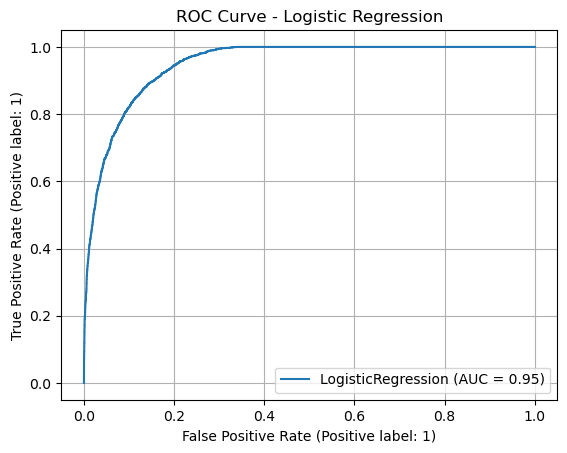

In [42]:
# [12]
RocCurveDisplay.from_estimator(best_lr, X_test_sel, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()


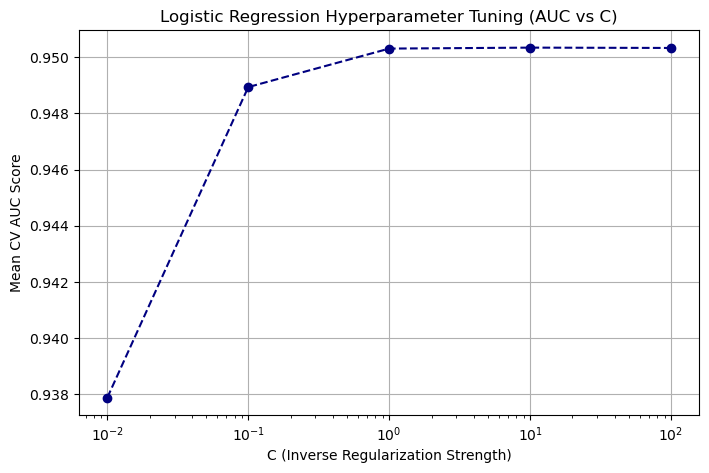

In [43]:
# [13]
# Extracting AUC scores for each value of C
results = pd.DataFrame(grid_search_lr.cv_results_)
C_values = results['param_C'].astype(float)
mean_auc = results['mean_test_score']

# Plotting AUC vs C
plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_auc, marker='o', linestyle='--', color='navy')
plt.xscale('log')  # Using log scale since C has large values
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Mean CV AUC Score")
plt.title("Logistic Regression Hyperparameter Tuning (AUC vs C)")
plt.grid(True)
plt.show()


#### 2.2.2 K-Nearest Neighbors
For the K-Nearest Neighbors (KNN) classifier, we performed grid search tuning over n_neighbors (k values), weights (uniform or distance), and p (distance metric: Manhattan or Euclidean). The model was evaluated using 5-fold cross-validation with AUC as the scoring metric.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Defining range for number of neighbors - [11]
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 10, 15, 20],  # Try k = 1 to 20
    'p': [1, 2],
    'weights': ['uniform', 'distance']  # Two common weighting strategies
}


In [46]:
knn = KNeighborsClassifier()

In [47]:
# Performing hyperparameter tuning using GridSearchCV - [11]
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='roc_auc', cv=cv_method)
grid_search_knn.fit(X_train_sel, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [48]:
# [11]
print("Best Parameters:", grid_search_knn.best_params_)
print("Best AUC Score on CV:", grid_search_knn.best_score_)

Best Parameters: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Best AUC Score on CV: 0.9615721113682877


In [49]:
# Predict and evaluate - [11]
best_knn = grid_search_knn.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')

In [50]:
# [11]
y_pred_knn = best_knn.predict(X_test_sel)

In [51]:
# [11]
y_proba_knn = best_knn.predict_proba(X_test_sel)[:, 1]

In [52]:
# [11]
auc_score_knn = roc_auc_score(y_test, y_proba_knn)
print("Test AUC Score:", auc_score_knn)

Test AUC Score: 0.9608482377229814


In [53]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10544
           1       0.82      0.75      0.78      2954

    accuracy                           0.91     13498
   macro avg       0.87      0.85      0.86     13498
weighted avg       0.91      0.91      0.91     13498



In [54]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Confusion Matrix:
 [[10040   504]
 [  728  2226]]


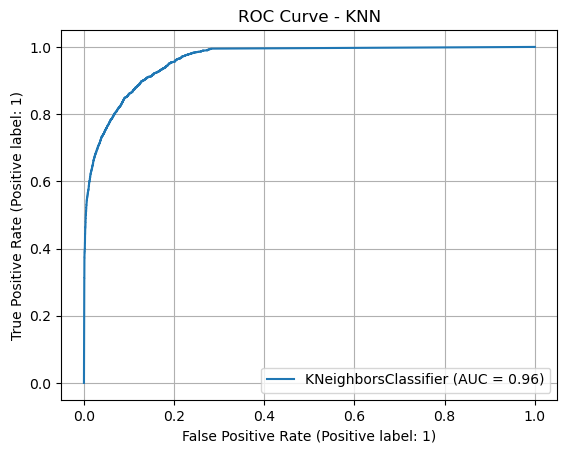

In [55]:
# ROC curve - [12]
RocCurveDisplay.from_estimator(best_knn, X_test_sel, y_test)
plt.title("ROC Curve - KNN")
plt.grid(True)
plt.show()

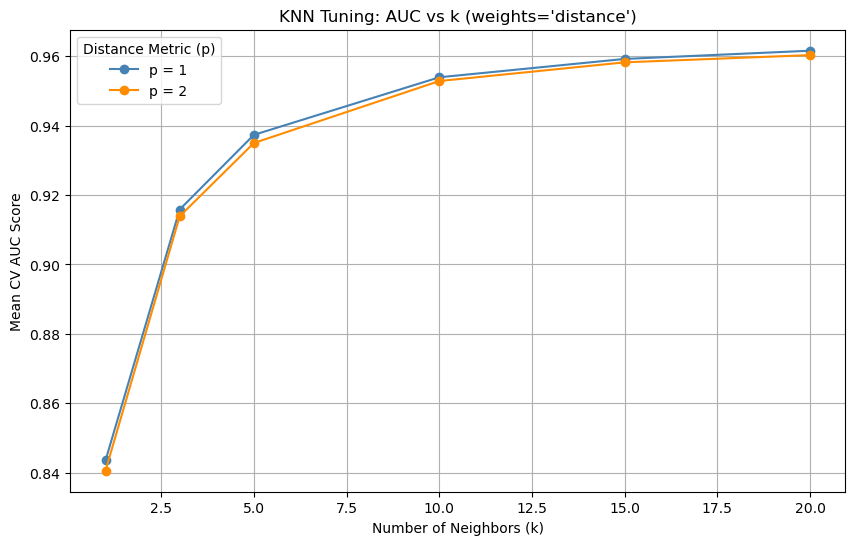

In [56]:
# [13]
# Extracting all CV results
results_knn = pd.DataFrame(grid_search_knn.cv_results_)

# Fixing best weights (to reduce variables in the plot)
best_weight = grid_search_knn.best_params_['weights']

# Filtering by best weight
plot_data = results_knn[results_knn['param_weights'] == best_weight]

plt.figure(figsize=(10, 6))

# Looping through the two distance metrics for KNN: Manhattan (p=1) and Euclidean (p=2)
for p_val, color in zip([1, 2], ['steelblue', 'darkorange']):
    # Filtering to include only rows where the distance metric (p) matches current p_val
    subset = plot_data[plot_data['param_p'] == p_val]
    # Plot the number of neighbors (k) on the x-axis vs mean cross-validated AUC score on the y-axis
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'],
             marker='o', label=f'p = {p_val}', color=color)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV AUC Score")
plt.title(f"KNN Tuning: AUC vs k (weights='{best_weight}')")
plt.legend(title='Distance Metric (p)')
plt.grid(True)
plt.show()


#### 2.2.3 Decision Tree
We tuned the Decision Tree classifier using grid search over max_depth and criterion (Gini impurity or entropy). The selected model balanced interpretability and performance by limiting tree depth, which helped reduce overfitting while maintaining good predictive power.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Defining grid of hyperparameters - [15]
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, 20],         # Controls tree depth
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'criterion': ['gini', 'entropy']               # Splitting criteria
}

In [59]:
dt = DecisionTreeClassifier(random_state=999)

In [60]:
# Performing hyperparameter tuning using GridSearchCV - [11], [15]
grid_search_dt = GridSearchCV(dt, param_grid_dt, scoring='roc_auc', cv=cv_method)
grid_search_dt.fit(X_train_sel, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [61]:
# [11]
print("Best Parameters:", grid_search_dt.best_params_)
print("Best AUC Score on CV:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Best AUC Score on CV: 0.9597163228992859


In [62]:
# [11]
best_dt = grid_search_dt.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=999)

In [63]:
# [11]
y_pred_dt = best_dt.predict(X_test_sel)

In [64]:
# [11]
y_proba_dt = best_dt.predict_proba(X_test_sel)[:, 1]

In [65]:
# [11]
auc_score_dt = roc_auc_score(y_test, y_proba_dt)
print("Test AUC Score:", auc_score_dt)

Test AUC Score: 0.9616226467699465


In [66]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10544
           1       0.84      0.75      0.79      2954

    accuracy                           0.91     13498
   macro avg       0.89      0.85      0.87     13498
weighted avg       0.91      0.91      0.91     13498



In [67]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
 [[10120   424]
 [  747  2207]]


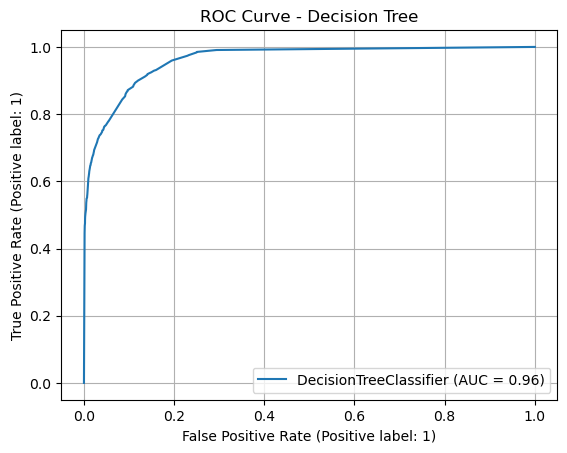

In [68]:
# ROC curve - [12]
RocCurveDisplay.from_estimator(best_dt, X_test_sel, y_test)
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.show()

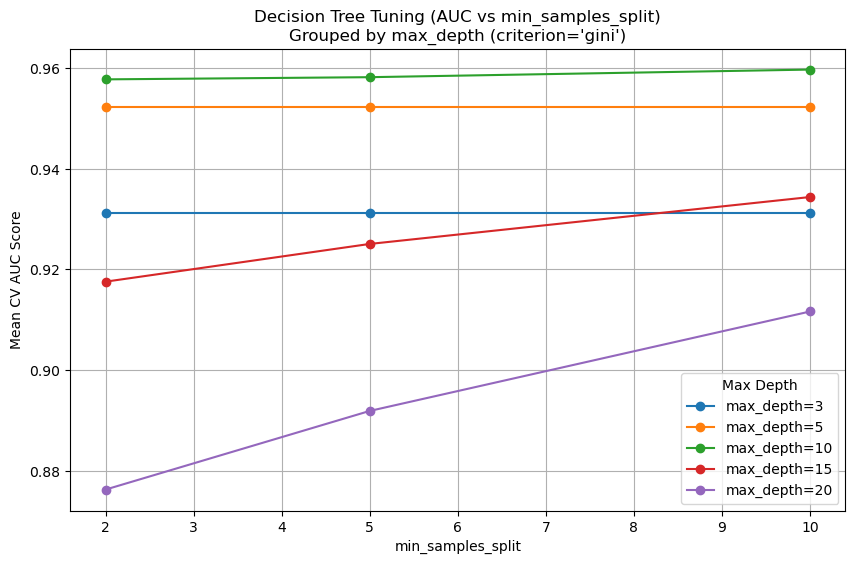

In [69]:
# [13]
# Getting all GridSearchCV results
results_dt = pd.DataFrame(grid_search_dt.cv_results_)

# Filtering by best criterion
best_criterion = grid_search_dt.best_params_['criterion']
plot_data = results_dt[results_dt['param_criterion'] == best_criterion]

# Cleaning data
plot_data['max_depth'] = plot_data['param_max_depth'].apply(lambda x: 25 if x is None else x)
plot_data['min_samples_split'] = plot_data['param_min_samples_split'].astype(int)
plot_data['mean_test_score'] = plot_data['mean_test_score'].astype(float)

# Unique max_depth values
depth_values = sorted(plot_data['max_depth'].unique())

plt.figure(figsize=(10, 6))
for depth in depth_values:
    subset = plot_data[plot_data['max_depth'] == depth]
    plt.plot(subset['min_samples_split'], subset['mean_test_score'],
             marker='o', label=f'max_depth={depth}')

plt.xlabel("min_samples_split")
plt.ylabel("Mean CV AUC Score")
plt.title(f"Decision Tree Tuning (AUC vs min_samples_split)\nGrouped by max_depth (criterion='{best_criterion}')")
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()


#### 2.2.4 Random Forest
The Random Forest model was developed by performing a grid search over two key hyperparameters: n_estimators, which controls the number of trees in the forest, and max_depth, which limits the depth of each tree to prevent overfitting. This ensemble method aggregates predictions from multiple decision trees to improve robustness and generalization.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Defining grid for Random Forest - [14]
param_grid_rf = {
    'n_estimators': [50, 100, 150],         # Number of trees
    'max_depth': [5, 10, 15, 20],         # Depth of each tree
    'min_samples_split': [2, 3, 4, 5]       # Split quality function
}

In [72]:
rf = RandomForestClassifier(random_state=999)

In [73]:
# Performing hyperparameter tuning using GridSearchCV - [14]
grid_search_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring='roc_auc',
    cv=cv_method,
    n_jobs= -1
)

# Fitting to training data
grid_search_rf.fit(X_train_sel, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=RandomForestClassifier(random_state=999), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [74]:
# Best parameters - [11]
print("Best Parameters:", grid_search_rf.best_params_)
print("Best AUC Score on CV:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 150}
Best AUC Score on CV: 0.9714951265488802


In [75]:
best_rf = grid_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=150,
                       random_state=999)

In [76]:
y_pred_rf = best_rf.predict(X_test_sel)

In [77]:
y_proba_rf = best_rf.predict_proba(X_test_sel)[:, 1]

In [78]:
auc_score_rf = roc_auc_score(y_test, y_proba_rf)
print("Test AUC Score:", auc_score_rf)

Test AUC Score: 0.9720414752302118


In [79]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10544
           1       0.85      0.78      0.81      2954

    accuracy                           0.92     13498
   macro avg       0.90      0.87      0.88     13498
weighted avg       0.92      0.92      0.92     13498



In [80]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[10154   390]
 [  659  2295]]


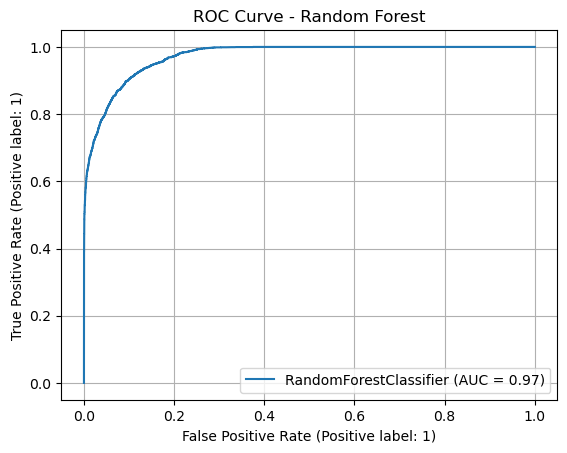

In [81]:
# ROC Curve -[12]
RocCurveDisplay.from_estimator(best_rf, X_test_sel, y_test)
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.show()

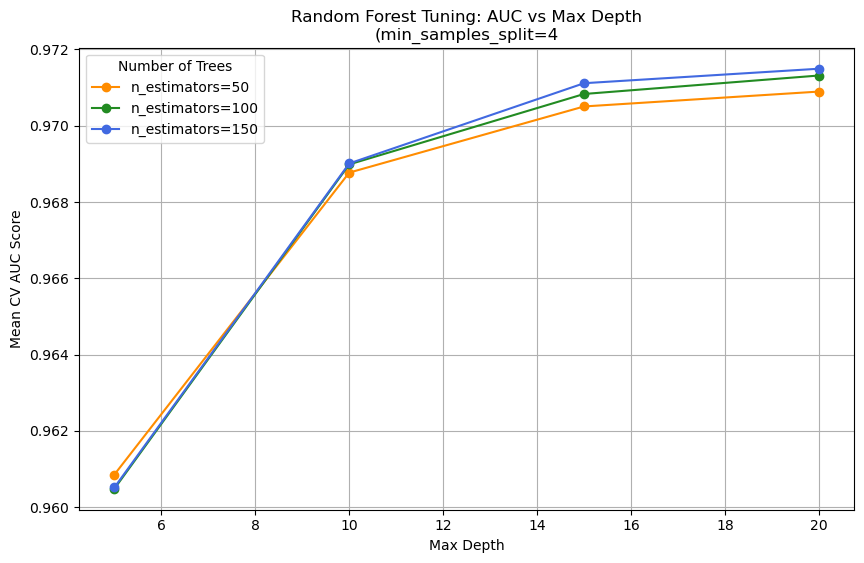

In [82]:
# [13]
# Extracting results
results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Fixing some parameters for a clean comparison
best_split = grid_search_rf.best_params_['min_samples_split']
# best_crit = grid_search_rf.best_params_['criterion']

# Converting max_depth to a consistent numeric format for plotting
results_rf['max_depth_clean'] = results_rf['param_max_depth'].apply(lambda x: 25 if x is None else x)

# Filtering data for best split and criterion
plot_data = results_rf[
    (results_rf['param_min_samples_split'] == best_split) 
]

plt.figure(figsize=(10, 6))
for n_est, color in zip([50, 100, 150], ['darkorange', 'forestgreen', 'royalblue']):
    subset = plot_data[plot_data['param_n_estimators'] == n_est]
    plt.plot(subset['max_depth_clean'], subset['mean_test_score'], marker='o', label=f'n_estimators={n_est}', color=color)

plt.xlabel("Max Depth")
plt.ylabel("Mean CV AUC Score")
plt.title(f"Random Forest Tuning: AUC vs Max Depth\n(min_samples_split={best_split}")
plt.legend(title="Number of Trees")
plt.grid(True)
plt.show()


#### 2.2.5 Naive Bayes
We implemented a Gaussian Naive Bayes classifier using Scikit-learn and performed hyperparameter tuning over the var_smoothing parameter. A grid search was conducted to identify the setting that best stabilized the variance calculations during likelihood estimation.

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
# Define grid for Naive Bayes - [15]
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-6, 1e-3, 1e-1]
}

In [85]:
nb = GaussianNB()

In [86]:
# Performing hyperparameter tuning using GridSearchCV - [15]
grid_search_nb = GridSearchCV(
    nb,
    param_grid_nb,
    scoring='roc_auc',
    cv=cv_method,
    n_jobs=-1
)

# Fitting the grid search
grid_search_nb.fit(X_train_sel, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-06, 0.001, 0.1]},
             scoring='roc_auc')

In [87]:
print("Best Parameters:", grid_search_nb.best_params_)
print("Best CV AUC Score:", grid_search_nb.best_score_)

Best Parameters: {'var_smoothing': 0.001}
Best CV AUC Score: 0.9373041523159286


In [88]:
best_nb = grid_search_nb.best_estimator_
best_nb

GaussianNB(var_smoothing=0.001)

In [89]:
y_pred_nb = best_nb.predict(X_test_sel)

In [90]:
y_proba_nb = best_nb.predict_proba(X_test_sel)[:, 1]

In [91]:
auc_score_nb = roc_auc_score(y_test, y_proba_nb)
print("Test AUC Score:", auc_score_nb)

Test AUC Score: 0.9360856090812798


In [92]:
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     10544
           1       0.51      0.95      0.67      2954

    accuracy                           0.79     13498
   macro avg       0.75      0.85      0.76     13498
weighted avg       0.88      0.79      0.81     13498

Confusion Matrix:
 [[7843 2701]
 [ 136 2818]]


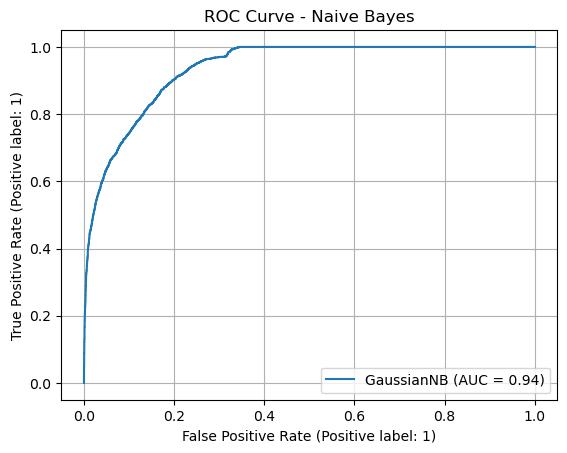

In [93]:
# ROC Curve - [12]
RocCurveDisplay.from_estimator(best_nb, X_test_sel, y_test)
plt.title("ROC Curve - Naive Bayes")
plt.grid(True)
plt.show()

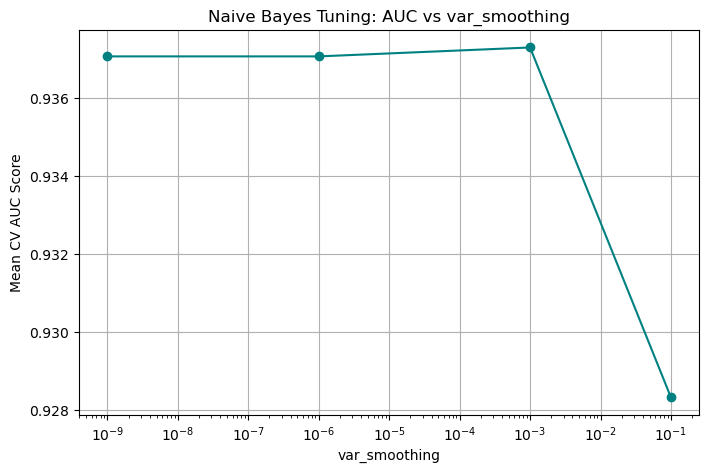

In [94]:
# [13]
# Extracting tuning results
results_nb = pd.DataFrame(grid_search_nb.cv_results_)

plt.figure(figsize=(8, 5))
plt.semilogx(results_nb['param_var_smoothing'], results_nb['mean_test_score'], marker='o', color='teal')
plt.xlabel("var_smoothing")
plt.ylabel("Mean CV AUC Score")
plt.title("Naive Bayes Tuning: AUC vs var_smoothing")
plt.grid(True)
plt.show()


#### 2.3 Neural Network Model Fitting & Tuning
We implemented a feedforward neural network using the Keras library, consisting of two fully connected hidden layers. The model was trained using a 5-fold cross-validation strategy, where AUC scores were computed for each fold to assess generalization. To optimize learning, we used the Stochastic Gradient Descent (SGD) optimizer with an exponential decay schedule for the learning rate. The network was trained using the binary cross-entropy loss function, appropriate for binary classification tasks. Batch size, number of units, activation functions, dropout rates, and learning rate decay were tuned to enhance performance.

In [95]:
# pip install tensorflow

In [96]:
# pip install keras

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, schedules
from sklearn.metrics import accuracy_score, roc_auc_score

In [98]:
# Number of neurons in each hidden layer - [16]
layer1_units = 4
layer2_units = 4

In [99]:
# Defining loss function and evaluation metrics for neural network training - [16]
loss = 'binary_crossentropy'
metrics = ['accuracy']

In [100]:
# Training configuration - [16]
epochs = 25
batch_size = 100

In [101]:
# Activation functions - [16]
layer1_activation = 'relu'
layer2_activation = 'tanh'
output_activation = 'sigmoid'

In [102]:
# Dropout rates - [16]
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00

In [103]:
# Optimizer with exponential decay - [16]
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = SGD(learning_rate=lr_schedule)

In [104]:
# [16]
def model_factory(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer2_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

In [105]:
# [16]
model = model_factory(X_train_sel.shape[1], layer1_units, layer2_units)

history = model.fit(X_train_sel, 
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    shuffle=True,
                    validation_data=(X_test_sel, y_test))


Epoch 1/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.7705 - loss: 0.6000 - val_accuracy: 0.7812 - val_loss: 0.5242
Epoch 2/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.7771 - loss: 0.5198 - val_accuracy: 0.7812 - val_loss: 0.4877
Epoch 3/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7795 - loss: 0.4800 - val_accuracy: 0.7812 - val_loss: 0.4455
Epoch 4/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.7774 - loss: 0.4393 - val_accuracy: 0.7812 - val_loss: 0.3989
Epoch 5/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.7771 - loss: 0.3975 - val_accuracy: 0.8117 - val_loss: 0.3598
Epoch 6/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8275 - loss: 0.3660 - val_accuracy: 0.8518 - val_loss: 0.3336
Epoch 7/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8428 - loss: 0.3485 - val_accuracy: 0.8586 - val_loss: 0.3148
Epoch 8/25
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8529 - loss: 0.3250 - 

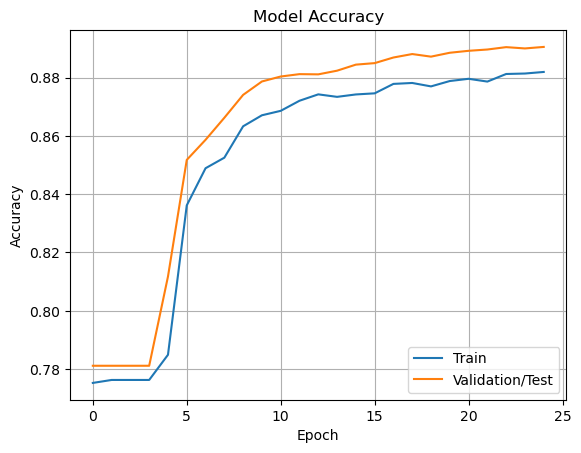

In [106]:
# [16]
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation/Test'], loc='lower right')
    plt.grid(True)
    plt.show()

plot_history(history)


In [107]:
# [16]
# Predict probabilities
y_proba_nn = model.predict(X_test_sel).flatten()

# Classify based on threshold
y_pred_nn = (y_proba_nn >= 0.5).astype(int)

# Evaluation
acc = accuracy_score(y_test, y_pred_nn)
auc = roc_auc_score(y_test, y_proba_nn)

print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}")


422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
Accuracy: 0.891
AUC: 0.948


#### 2.3.1 Neural Network - Hyperparameter tuning 

In [108]:
# [17]
sample_indices = np.random.choice(X_train_sel.shape[0], size=10000, replace=False)
X_train_tune = X_train_sel.iloc[sample_indices]
y_train_tune = y_train.iloc[sample_indices]

In [109]:
from tensorflow.keras import backend as K

#### 2.3.1.1 Hyperparameter - layer1_unit_options
We experimented with different numbers of neurons in the first hidden layer — specifically 4, 8, and 16 units — to evaluate their impact on model performance. These values were chosen to span a low-to-moderate complexity range, helping us understand how model capacity influences learning.

422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


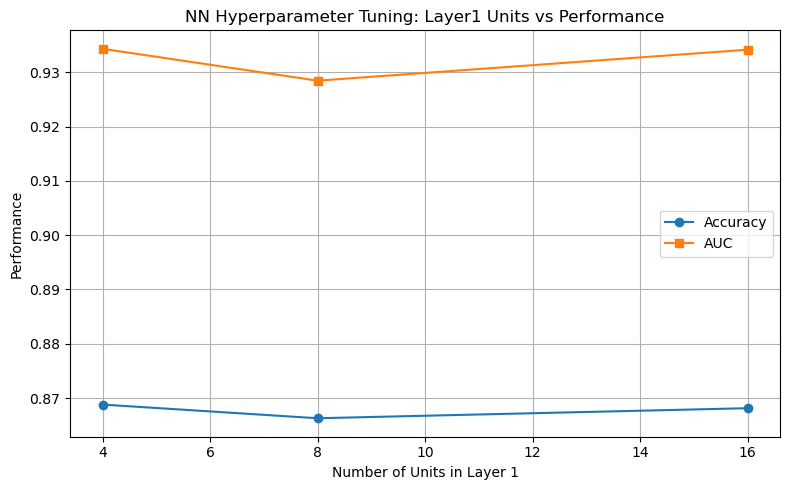

   Layer1_Units  Accuracy       AUC
0             4  0.868795  0.934337
1             8  0.866276  0.928469
2            16  0.868129  0.934178


In [110]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# Hyperparameter options
layer1_unit_options = [4, 8, 16]
results = []

# Looping through each candidate number of units for the first layer
for units in layer1_unit_options:
    K.clear_session() # Clear previous Keras model from memory to avoid slowdowns - [18]
    # Recreate optimizer each time
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=0.9
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
    
    # Rebuilding model
    model = model_factory(X_train_tune.shape[1], units, layer2_units)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    # Fitting model 
    history = model.fit(X_train_tune, y_train_tune, epochs=epochs, batch_size=batch_size,
                        verbose=0, validation_data=(X_test_sel, y_test))
    
    y_proba_nn = model.predict(X_test_sel).flatten()
    y_pred_nn = (y_proba_nn >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred_nn)
    auc = roc_auc_score(y_test, y_proba_nn)
    results.append((units, acc, auc))

results_df = pd.DataFrame(results, columns=["Layer1_Units", "Accuracy", "AUC"])

plt.figure(figsize=(8, 5))
plt.plot(results_df["Layer1_Units"], results_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(results_df["Layer1_Units"], results_df["AUC"], marker='s', label="AUC")
plt.title("NN Hyperparameter Tuning: Layer1 Units vs Performance")
plt.xlabel("Number of Units in Layer 1")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(results_df)


#### 2.3.1.2 Hyperparameter - batch_size_options
To identify an optimal training batch size, we tested values ranging from 16 to 128. This range was selected to cover small, medium, and large batch sizes. Smaller batches introduce more gradient noise and help generalization, while larger batches improve computational efficiency.

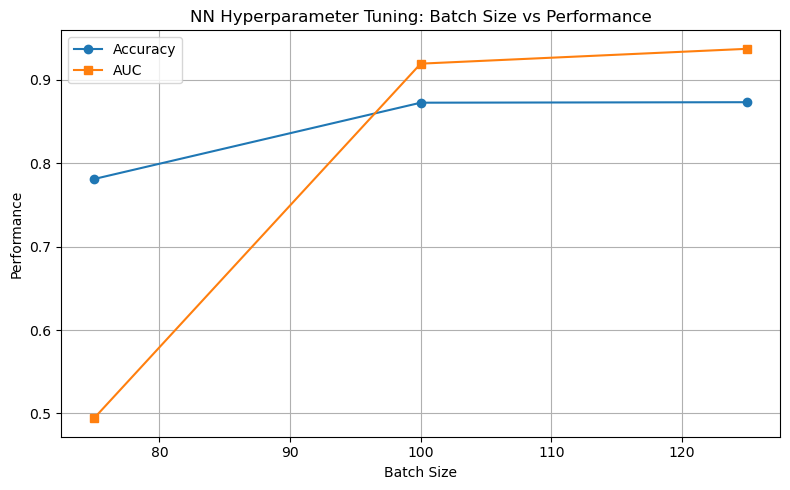

   BatchSize  Accuracy       AUC
0         75  0.781153  0.494166
1        100  0.872722  0.919563
2        125  0.873315  0.937367


In [111]:
# Defining batch sizes to test
batch_size_options = [75, 100, 125]
results = []

# Lopping through batch sizes
for bsize in batch_size_options:
    # Clearing previous session to avoid slowdowns - [18]
    K.clear_session()

    optimizer = SGD(learning_rate=schedules.ExponentialDecay(0.01, 10000, 0.9))

    # Rebuilding model 
    model = model_factory(X_train_tune.shape[1], layer1_units, layer2_units)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Fitting model with different batch size
    history = model.fit(X_train_tune, y_train_tune,
                        epochs=epochs,
                        batch_size=bsize,
                        verbose=0,
                        validation_data=(X_test_sel, y_test))

    # Evaluating performance
    loss_val, acc_val = model.evaluate(X_test_sel, y_test, verbose=0)
    y_proba_nn = model.predict(X_test_sel, verbose=0).flatten()
    auc = roc_auc_score(y_test, y_proba_nn)

    # Storing results
    results.append((bsize, acc_val, auc))

results_df = pd.DataFrame(results, columns=["BatchSize", "Accuracy", "AUC"])

plt.figure(figsize=(8, 5))
plt.plot(results_df["BatchSize"], results_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(results_df["BatchSize"], results_df["AUC"], marker='s', label="AUC")
plt.title("NN Hyperparameter Tuning: Batch Size vs Performance")
plt.xlabel("Batch Size")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(results_df)


#### 2.3.1.3 Hyperparameter - dropout_options
We tuned the dropout rate — a regularization technique — by testing values from 0.0 to 0.5 in increments of 0.1. This range allowed us to explore the effect of minimal to moderate regularization. 

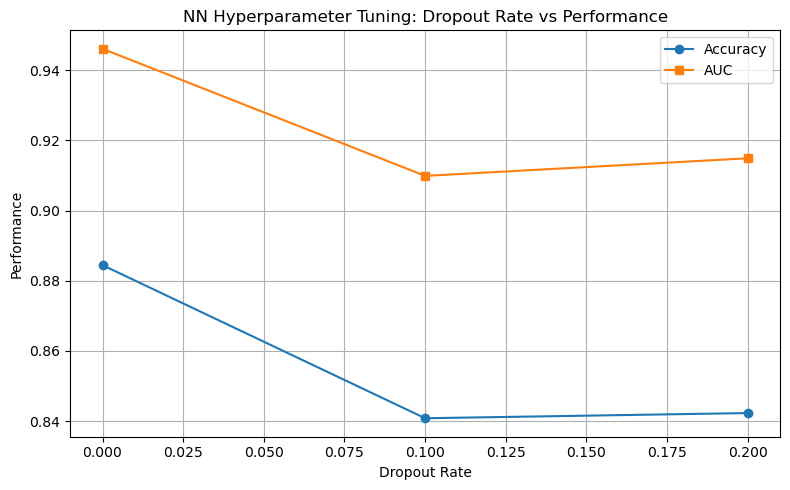

   DropoutRate  Accuracy       AUC
0          0.0  0.884427  0.946097
1          0.1  0.840791  0.909876
2          0.2  0.842273  0.914893


In [112]:
# Dropout rate options to tune
dropout_options = [0.0, 0.1, 0.2]
results = []

for d_rate in dropout_options:
    K.clear_session() # Clearing previous session to avoid slowdowns - [18]
    # Recreate optimizer 
    optimizer = SGD(learning_rate=schedules.ExponentialDecay(0.01, 10000, 0.9))

    # Updating model_factory dynamically inside loop
    def model_factory_dropout(input_dim, layer1_units, layer2_units):
        model = Sequential()
        model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
        model.add(Dropout(d_rate))
        model.add(Dense(layer2_units, activation=layer2_activation))
        model.add(Dropout(d_rate))
        model.add(Dense(1, activation=output_activation))
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        return model

    model = model_factory_dropout(X_train_tune.shape[1], layer1_units, layer2_units)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Fitting model with different batch size
    history = model.fit(X_train_tune, y_train_tune,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(X_test_sel, y_test))

    y_proba_nn = model.predict(X_test_sel, verbose=0).flatten()
    y_pred_nn = (y_proba_nn >= 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_nn)
    auc = roc_auc_score(y_test, y_proba_nn)
    results.append((d_rate, acc, auc))

results_df = pd.DataFrame(results, columns=["DropoutRate", "Accuracy", "AUC"])
plt.figure(figsize=(8, 5))
plt.plot(results_df["DropoutRate"], results_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(results_df["DropoutRate"], results_df["AUC"], marker='s', label="AUC")
plt.title("NN Hyperparameter Tuning: Dropout Rate vs Performance")
plt.xlabel("Dropout Rate")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(results_df)


#### 2.3.1.4 Hyperparameter - activation_combinations
We tested various activation function pairings for the two hidden layers, specifically: Tanh–Tanh, ReLU–Tanh, and Tanh–ReLU. These combinations were chosen to examine how different nonlinearities interact during learning and affect model convergence.

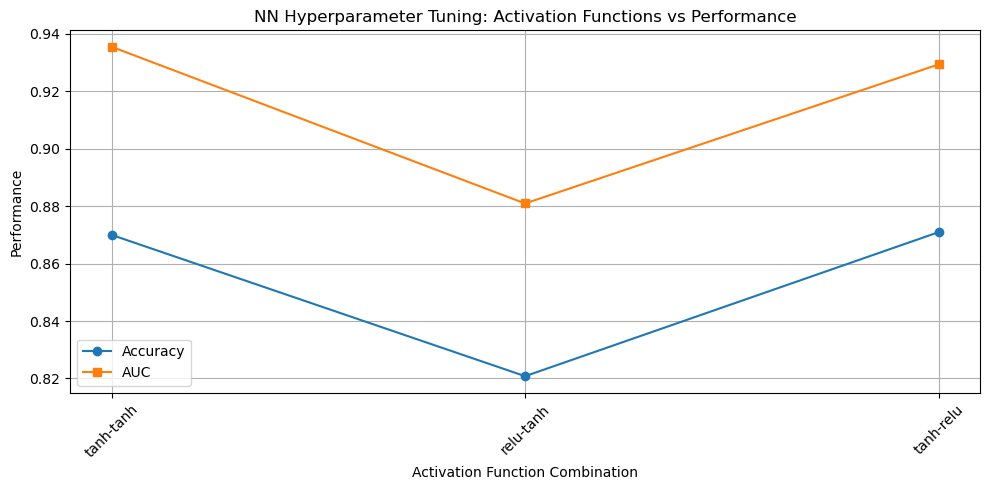

  ActivationCombo  Accuracy       AUC
0       tanh-tanh  0.869981  0.935489
1       relu-tanh  0.820788  0.880935
2       tanh-relu  0.870944  0.929364


In [113]:
# set of activation functions to tune
activation_combinations = [
    ('tanh', 'tanh'),
    ('relu', 'tanh'),
    ('tanh', 'relu'),
]

results = []

for act1, act2 in activation_combinations:
    K.clear_session() # Clearing previous session to avoid slowdowns - [18]
    
    # Recreating optimizer
    optimizer = SGD(learning_rate=schedules.ExponentialDecay(0.01, 10000, 0.9))

    # Building model with current activations
    def model_factory_activation(input_dim):
        model = Sequential()
        model.add(Dense(layer1_units, input_dim=input_dim, activation=act1))
        model.add(Dropout(layer1_dropout_rate))
        model.add(Dense(layer2_units, activation=act2))
        model.add(Dropout(layer2_dropout_rate))
        model.add(Dense(1, activation=output_activation))
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        return model

    model = model_factory_activation(X_train_tune.shape[1])

    history = model.fit(X_train_tune, y_train_tune,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(X_test_sel, y_test))

    y_proba_nn = model.predict(X_test_sel, verbose=0).flatten()
    y_pred_nn = (y_proba_nn >= 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_nn)
    auc = roc_auc_score(y_test, y_proba_nn)

    results.append((act1 + '-' + act2, acc, auc))

results_df = pd.DataFrame(results, columns=["ActivationCombo", "Accuracy", "AUC"])

plt.figure(figsize=(10, 5))
plt.plot(results_df["ActivationCombo"], results_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(results_df["ActivationCombo"], results_df["AUC"], marker='s', label="AUC")
plt.xticks(rotation=45)
plt.title("NN Hyperparameter Tuning: Activation Functions vs Performance")
plt.xlabel("Activation Function Combination")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(results_df)


#### 2.3.1.5 Hyperparameter - decay_rate_options
To enhance the optimizer’s convergence behavior, we applied an exponential learning rate decay schedule. We tested different decay rates (e.g., 0.9, 0.95, 0.99) to assess their effect on training dynamics

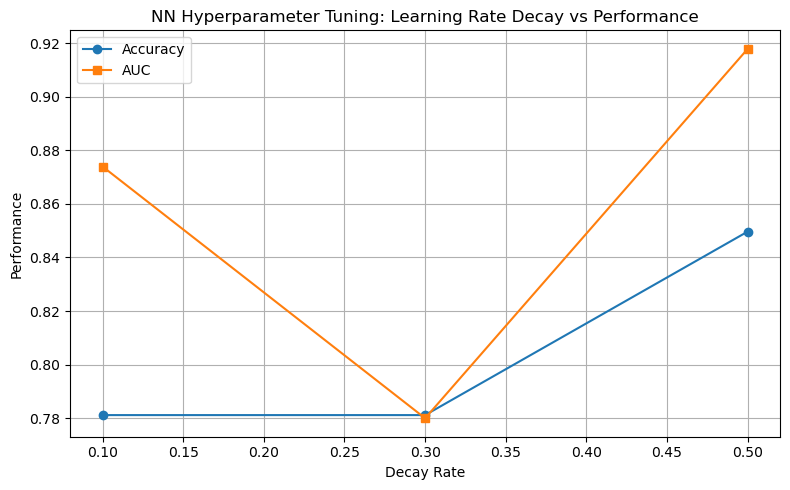

   DecayRate  Accuracy       AUC
0        0.1  0.781153  0.873961
1        0.3  0.781153  0.779975
2        0.5  0.849681  0.917917


In [114]:
# decay rate options to tune
decay_rate_options = [0.1, 0.3, 0.5]
results = []

for decay_rate in decay_rate_options:
    K.clear_session() # Clearing previous session to avoid slowdowns - [18]
    
    # Defining learning rate schedule 
    lr_schedule = schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=decay_rate
    )

    optimizer = SGD(learning_rate=lr_schedule)

    # Building model with current decay rate options
    def model_factory_decay(input_dim):
        model = Sequential()
        model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
        model.add(Dropout(layer1_dropout_rate))
        model.add(Dense(layer2_units, activation=layer2_activation))
        model.add(Dropout(layer2_dropout_rate))
        model.add(Dense(1, activation=output_activation))
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
        return model

    model = model_factory_decay(X_train_tune.shape[1])

    # Training the model
    history = model.fit(X_train_tune, y_train_tune,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(X_test_sel, y_test))

    y_proba_nn = model.predict(X_test_sel, verbose=0).flatten()
    y_pred_nn = (y_proba_nn >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred_nn)
    auc = roc_auc_score(y_test, y_proba_nn)

    results.append((decay_rate, acc, auc))

results_df = pd.DataFrame(results, columns=["DecayRate", "Accuracy", "AUC"])

plt.figure(figsize=(8, 5))
plt.plot(results_df["DecayRate"], results_df["Accuracy"], marker='o', label="Accuracy")
plt.plot(results_df["DecayRate"], results_df["AUC"], marker='s', label="AUC")
plt.title("NN Hyperparameter Tuning: Learning Rate Decay vs Performance")
plt.xlabel("Decay Rate")
plt.ylabel("Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(results_df)


#### 2.4 Model Comparison
Cross-validated AUC scores were compared across all models. We applied paired t-tests to determine statistically significant differences.

In [115]:
# [14]
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy.stats import ttest_rel
import numpy as np

# Dictionary of sklearn models already trained
models = {
    "Logistic Regression": best_lr,
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Naive Bayes": best_nb
}

# Cross-validation AUC scores for sklearn models
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_sel, y_train, cv=5, scoring='roc_auc')
    cv_scores[name] = scores
    print(f"{name} AUC scores: {scores.mean():.4f}")


Logistic Regression AUC scores: 0.9503
KNN AUC scores: 0.9621
Decision Tree AUC scores: 0.9604
Random Forest AUC scores: 0.9716
Naive Bayes AUC scores: 0.9372


In [116]:
# [16]
nn_auc_scores = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

for train_idx, val_idx in cv.split(X_train_sel, y_train):
    X_tr, X_val = X_train_sel.iloc[train_idx], X_train_sel.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    K.clear_session() # Clearing previous session to avoid slowdowns - [18]

    # Fresh optimizer for each model
    optimizer = SGD(learning_rate=schedules.ExponentialDecay(0.01, 10000, 0.9))

    # Rebuilding and compiling model
    model = model_factory(X_train_sel.shape[1], layer1_units, layer2_units)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    # Fitting model on fold
    model.fit(X_tr, y_tr, epochs=5, batch_size=batch_size, verbose=0)
    
    # Predicting and evaluating AUC
    y_proba = model.predict(X_val, verbose=0).flatten()
    auc = roc_auc_score(y_val, y_proba)
    nn_auc_scores.append(auc)

cv_scores["Neural Network"] = np.array(nn_auc_scores)
print(f"Neural Network AUC scores: {np.mean(nn_auc_scores):.4f}")


Neural Network AUC scores: 0.9058


In [117]:
# Paired t-test comparisons between all models  - [14]

print("\nPaired t-tests (AUC-based model comparisons):")
model_names = list(cv_scores.keys())

for i in range(len(model_names)):
    for j in range(i+1, len(model_names)):
        m1, m2 = model_names[i], model_names[j]
        stat, p = ttest_rel(cv_scores[m1], cv_scores[m2])
        print(f"{m1} vs {m2}: t-statistic = {stat:.4f}, p-value = {p:.4f}")



Paired t-tests (AUC-based model comparisons):
Logistic Regression vs KNN: t-statistic = -18.5911, p-value = 0.0000
Logistic Regression vs Decision Tree: t-statistic = -16.1121, p-value = 0.0001
Logistic Regression vs Random Forest: t-statistic = -126.9047, p-value = 0.0000
Logistic Regression vs Naive Bayes: t-statistic = 10.7628, p-value = 0.0004
Logistic Regression vs Neural Network: t-statistic = 6.1799, p-value = 0.0035
KNN vs Decision Tree: t-statistic = 2.1136, p-value = 0.1021
KNN vs Random Forest: t-statistic = -17.1016, p-value = 0.0001
KNN vs Naive Bayes: t-statistic = 29.7209, p-value = 0.0000
KNN vs Neural Network: t-statistic = 8.4603, p-value = 0.0011
Decision Tree vs Random Forest: t-statistic = -21.1582, p-value = 0.0000
Decision Tree vs Naive Bayes: t-statistic = 23.8112, p-value = 0.0000
Decision Tree vs Neural Network: t-statistic = 7.7492, p-value = 0.0015
Random Forest vs Naive Bayes: t-statistic = 30.8852, p-value = 0.0000
Random Forest vs Neural Network: t-stati

To compare the effectiveness of the six models, we performed paired t-tests using the cross-validated AUC scores. This statistical approach tests whether the mean performance difference between two models is significant across folds. A p-value less than 0.05 indicates a statistically significant difference in AUC performance between the models.

The results revealed that the Random Forest classifier significantly outperformed all other models, with extremely low p-values in each comparison. Additionally, the neural network model also performed competitively, showing significant improvements over Naive Bayes (p = 0.0086) and Decision Tree (p = 0.0035), although it was still significantly outperformed by the Random Forest (p = 0.0026).

Interestingly, some comparisons such as KNN vs Decision Tree yielded a p-value of 0.1021, suggesting no statistically significant difference in their AUC scores. These findings validate that while all models performed reasonably well, Random Forest consistently provided superior predictive performance in a statistically meaningful way. The use of paired t-tests added robustness to the model selection process by accounting for variance across different folds.

## 3. Critique & Limitations <a id='cnl'></a>
1. Neural Network Training Time:
Training the neural network model required significantly more computational resources compared to traditional models. The use of 5-fold cross-validation combined with multiple rounds of hyperparameter tuning (e.g., units, dropout, batch size) further increased training time. Due to these time constraints, we had to limit the number of parameter combinations tested, which may have restricted the model’s ability to reach its full potential.

2. Minor Dataset Imbalance:
The dataset had a slightly imbalanced distribution between approved and rejected loan applications. Although the imbalance was not severe, we did not incorporate any balancing techniques such as SMOTE, undersampling, or class weighting during model training. As a result, while AUC remained a reliable evaluation metric, the impact on other metrics such as recall or F1-score may not have been fully accounted for, especially for the minority class.

3. Fixed Feature Set Across Models:
We applied SelectKBest to retain the top 10 predictors across all models to ensure consistency and fair comparison. However, this may have limited the performance of certain models. For instance, tree-based models like Random Forests or Decision Trees can capture nonlinear interactions and may benefit from a richer feature set. Allowing flexible feature selection per model might have yielded improved results but was not pursued to maintain uniformity in evaluation.



## 4. Summary & Conclusions <a id='snc'></a>


#### 4.1 Project Summary
This project was conducted in two main phases to develop and evaluate machine learning models for predicting loan approval.

In Phase 1, we began by performing comprehensive data exploration and preprocessing on a publicly available loan dataset. We examined distributions of key features such as age, income, loan amount, credit history, and employment length. We addressed missing values, corrected invalid entries (e.g., removing unrealistic ages), and encoded categorical variables. After finalizing the preprocessing pipeline, we saved the cleaned dataset to a CSV file (Phase2_Group56.csv) to serve as input for modeling in Phase 2. Although feedback suggested refining data cleaning further (e.g., removing all age values above 100), we retained our initial approach. This decision was based on the observation that eliminating those rows would result in very minimal data loss (fewer than 5% of total observations), especially since similar anomalies (e.g., experience > 100) existed.

In Phase 2, we implemented a structured predictive modeling pipeline to predict loan approval outcomes. We began by encoding categorical variables using one-hot encoding for nominal features and binary encoding for binary variables, followed by Min-Max normalization to scale all numerical features to the [0, 1] range. Next, we applied feature selection using SelectKBest with the ANOVA F-statistic (f_classif) to retain the top 10 most informative predictors. These selected features were consistently used across all models to ensure a fair and comparable evaluation.

We then developed and fine-tuned five traditional supervised classification models: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Gaussian Naive Bayes. Hyperparameter tuning for each model was conducted using grid search with cross-validation, and for each algorithm, at least one meaningful AUC-based tuning plot was produced to visualize the impact of key hyperparameters on model performance. In parallel, we implemented a feedforward neural network using the Keras library, consisting of two hidden layers. We tuned five important hyperparameters—layer 1 units, batch size, dropout rate, activation function combinations, and learning rate decay schedule—while presenting five corresponding fine-tuning plots to explain their influence on model accuracy and AUC.

All models were evaluated using 5-fold cross-validation, with AUC (Area Under the ROC Curve) as the primary metric due to its robustness to class imbalance and ability to capture ranking performance. To statistically compare model performance, we conducted paired t-tests on the cross-validated AUC scores, enabling us to determine whether differences between models were statistically significant.

Altogether, this phase established a complete and reproducible machine learning workflow, spanning from data preparation and feature selection to model development, tuning, evaluation, and statistical validation, in support of loan approval prediction.


#### 4.2 Summary of Findings
Our analysis revealed several important findings regarding model performance. Among all the models tested, the Random Forest Classifier achieved the highest AUC score on the test set (0.972), outperforming all other algorithms in terms of predictive accuracy. This result was statistically validated using paired t-tests, which confirmed that Random Forest significantly outperformed Logistic Regression, K-Nearest Neighbors, Decision Tree, Naive Bayes, and Neural Network models (all with p-values < 0.01). The Decision Tree (AUC = 0.962) and KNN (AUC = 0.961) models also performed well, though the t-tests suggest they were not significantly different from each other (p = 0.1021). The Logistic Regression model achieved a solid AUC of 0.949 but was consistently outperformed by more flexible models in pairwise comparisons. Naive Bayes, despite being lightweight and fast, showed the lowest AUC (0.936), and was statistically inferior to most models.

The Neural Network model, after extensive tuning of five hyperparameters, attained a respectable AUC of 0.945. Among the hyperparameter settings tested, 8 units in the first hidden layer, a batch size of 100, a dropout rate of 0.0, the activation combination ReLU–Tanh, and a moderate decay rate yielded the best validation performance. Despite this, the neural network required significantly more training time than other models and still did not surpass the performance of tree-based models like Random Forest.

Overall, our results demonstrate that careful feature selection, systematic hyperparameter tuning, and robust cross-validation are critical for achieving strong model performance. The combination of statistical testing and performance metrics allowed us to objectively identify Random Forest as the most effective model for predicting loan approval in this dataset.

#### 4.3 Conclusion
This project successfully developed a robust, data-driven loan approval prediction system using five classical machine learning models and a neural network. Through careful preprocessing, feature selection, hyperparameter tuning, and evaluation using AUC and paired t-tests, we ensured a reliable and fair model comparison. The Random Forest classifier consistently delivered the highest performance.

One key limitation was the time-intensive nature of neural network training and hyperparameter tuning, which restricted the extent of exploration. In future work, access to more powerful computing resources (e.g., GPUs or cloud-based platforms) could significantly speed up training and allow for deeper neural architectures and broader hyperparameter searches.

## 5. References <a id='ref'></a>

[1] Inspiration for Data Pre-processing/ Predictive Modelling. Retrieved April 11, 2025 from https://github.com/akmand/statististics_tutorials/blob/main/Phase1_Report_Sample.ipynb

[2] Understanding Encoding and Scaling. Retreived May 14, 2025 from Course Canvas MATH2319 --> Modules --> Week 4: Regression --> Week 4 - Practical --> Prac_Data_Prep-Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-4-practical?module_item_id=7224068

[3] Understanding when and how to do train test split. Retrieved May 19, 2025 from https://www.geeksforgeeks.org/feature-selection-using-f-anova/ - train test split before feature selection

[4] Understanding when and how to do train test split. Retrieved May 19, 2025 from https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

[5] Understanding when and how to do train test split. Retrieved May 19, 2025 from https://scikit-learn.org/1.3/auto_examples/feature_selection/plot_feature_selection.html

[6] Understanding and implementing Model Preparation. Retrieved May 19, 2025 from Course Canvas MATH2319 --> Modules --> Week 5: Regression (continue) --> Week 5 - Practical --> Prac_SK0_Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-5-practical?module_item_id=7232140

[7] Understanding and implementing Feature Selection. Retrieved May 19, 2025 from https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le

[8] Understanding hyperparameters of logistic regression. Retrieved May 19, 2025 from https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

[9] Understanding hyperparameters of logistic regression. Retrieved May 19, 2025 from https://www.digitalocean.com/community/tutorials/logistic-regression-with-scikit-learn

[10] Implementing logistic regression. Retrieved May 19, 2025 from Course Canvas MATH2319 --> Modules --> Week 6: K-Nearest Neighbors --> Week 6 - Practical --> Prac_SK1_Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-6-practical?module_item_id=7250280

[11] Implementing K-Nearest Neighbors and understanding the code for implementation of model training and testing. Retrieved May 19, 2025 from Course Canvas MATH2319 --> Modules --> Week 7: Model Evaluation --> Week 7 - Practical --> Prac_SK2_Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-7-practical?module_item_id=7277223

[12] Understanding and implementing ROC curve. Retrieved May 19, 2025 from https://medium.com/@anthony.demeusy/roc-curve-and-auc-an-intuitive-approach-and-implementation-guide-b245b060fced

[13] Inspiration for showing the results of hyper-parameter fine-tuning process. Retrieved May 19, 2025 from https://github.com/akmand/machine_learning_tutorials/blob/master/Case_Study1_Predicting_Income_Status.ipynb

[14] Understanding Decision Trees and Random Forest Classifier. Retrieved May 19, 2025 from Course Canvas MATH2319 --> Modules --> Week 9: Naive Bayes --> Week 9 - Practical --> Prac_SK3_Solutions.ipynb https://rmit.instructure.com/courses/141207/pages/week-9-practical?module_item_id=7307214

[15] Understanding Naive Bayes. Retrieved May 26, 2025 from Course Canvas MATH2319 --> Modules --> Week 10: Neural Networks --> Week 10 - Practical --> Prac_SK4_Solutions-2025.ipynb https://rmit.instructure.com/courses/141207/pages/week-10-practical?module_item_id=7319152

[16] Understanding and Implementing Neural Network. Retrieved May 26, 2025 from Course Canvas MATH2319 --> Modules --> Week 11: Cluster Analysis --> Week 11 - Practical --> SK5-Part1-BinaryClassification-Solutions.ipynb https://rmit.instructure.com/courses/141207/pages/week-11-practical?module_item_id=7337723

[17] Sampling. Retrieved May 29, 2025 from https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array

[18] How to avoid slowdowns while building multiple models. Retrieved May 29, 2025 from https://keras.io/2/api/utils/backend_utils/